In [1]:
#libraries for data cleaning and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
import plotly.express as px
import cufflinks as cf
cf.go_offline
import plotly.graph_objects as go
plt.style.use('ggplot')

In [2]:
#load dataset
df = pd.read_csv("C:/Users/sivaprasad/Downloads/archive (6)/amazon_delivery.csv")

In [3]:
#data types of attributes
df.dtypes

Order_ID            object
Agent_Age            int64
Agent_Rating       float64
Store_Latitude     float64
Store_Longitude    float64
Drop_Latitude      float64
Drop_Longitude     float64
Order_Date          object
Order_Time          object
Pickup_Time         object
Weather             object
Traffic             object
Vehicle             object
Area                object
Delivery_Time        int64
Category            object
dtype: object

In [4]:
#dataset preperation
df['Order_Date'] = df['Order_Date'].astype('datetime64')
df['Order_Time'] = df['Pickup_Time'].astype('datetime64').dt.time
df['Pickup_Time'] = df['Pickup_Time'].astype('datetime64').dt.time







In [5]:
df.rename(columns={'Delivery_Time':'Delivery_Time(Mins)'},inplace=True)


In [6]:
df.isnull().sum()

Order_ID                0
Agent_Age               0
Agent_Rating           54
Store_Latitude          0
Store_Longitude         0
Drop_Latitude           0
Drop_Longitude          0
Order_Date              0
Order_Time              0
Pickup_Time             0
Weather                91
Traffic                 0
Vehicle                 0
Area                    0
Delivery_Time(Mins)     0
Category                0
dtype: int64

In [53]:
df['Agent_Rating'].fillna(df['Agent_Rating'].mean(),inplace=True)
df['Weather'].fillna(df['Weather'].mode(),inplace=True)
df['Day'] = df['Order_Date'].dt.day_name()

In [54]:

df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time(Mins),Category,Day
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:45:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,Saturday
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:50:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,Friday
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:45:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,Saturday
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:10:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,Tuesday
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:45:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:45:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,Thursday
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,20:10:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,Wednesday
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,00:05:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,Friday
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:40:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,Monday


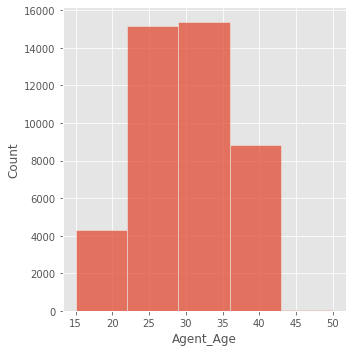

In [15]:
#distribution of features 
sns.displot(df['Agent_Age'],bins=5)

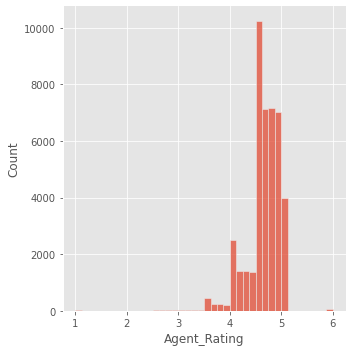

In [8]:
sns.displot(df['Agent_Rating'],bins=40)

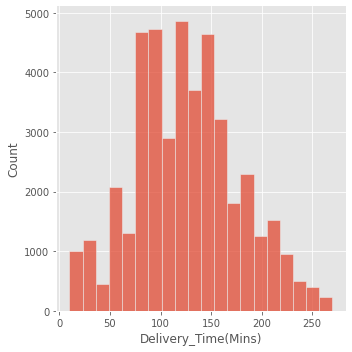

In [9]:
sns.displot(df['Delivery_Time(Mins)'],bins=20)

Text(0, 0.5, 'count')

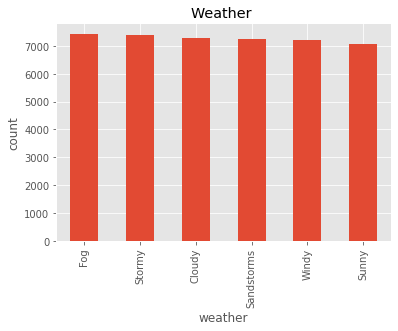

In [10]:
ax  = df['Weather'].value_counts().plot(kind='bar',title='Weather ')
ax.set_xlabel('weather')
ax.set_ylabel('count')

Text(0, 0.5, 'counts')

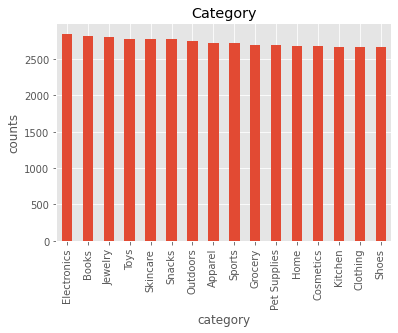

In [11]:
ax1  = df['Category'].value_counts().plot(kind='bar',title='Category')
ax1.set_xlabel('category')
ax1.set_ylabel('counts')

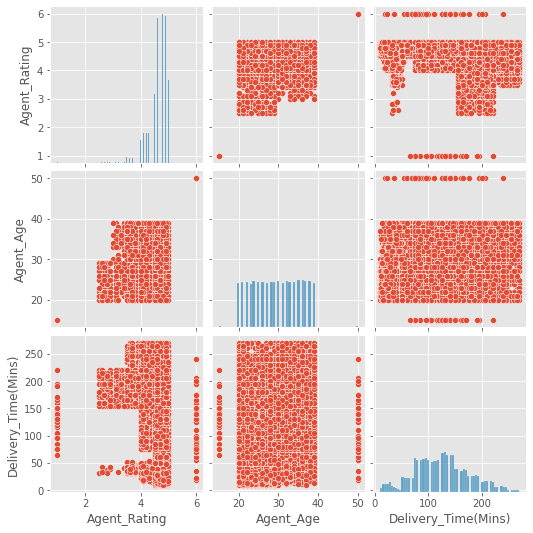

In [12]:
#Realationship between features
sns.pairplot(df,vars=['Agent_Rating','Agent_Age','Delivery_Time(Mins)'])

In [31]:
order_counts = df.groupby('Category')['Order_ID'].count().reset_index()
order_counts.columns = ['category','orders']

order_counts.sort_values('orders',axis=0,ascending=False).reset_index(drop=True)

,category,orders
0,Electronics,2849
1,Books,2824
2,Jewelry,2802
3,Toys,2781
4,Skincare,2772
5,Snacks,2770
6,Outdoors,2747
7,Apparel,2726
8,Sports,2719
9,Grocery,2691


<AxesSubplot:xlabel='Weather', ylabel='Delivery_Time(Mins)'>

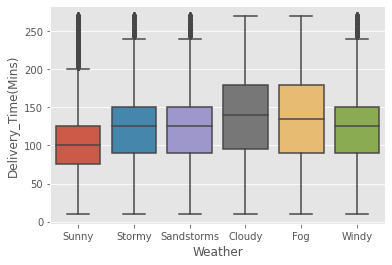

In [47]:
sns.boxplot(x=df['Weather'],y=df['Delivery_Time(Mins)'])


<AxesSubplot:xlabel='Vehicle', ylabel='Delivery_Time(Mins)'>

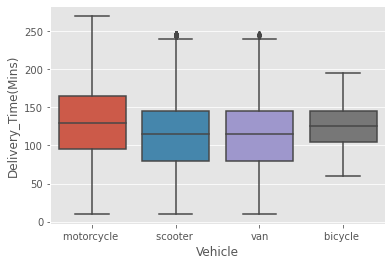

In [46]:
sns.boxplot(x=df['Vehicle'],y=df['Delivery_Time(Mins)'])


<AxesSubplot:xlabel='Traffic', ylabel='Delivery_Time(Mins)'>

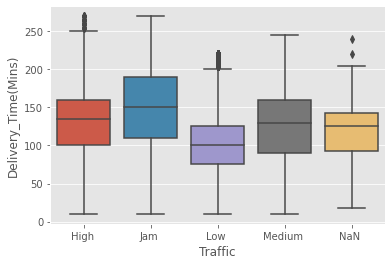

In [48]:
sns.boxplot(x=df['Traffic'],y=df['Delivery_Time(Mins)'])


<AxesSubplot:xlabel='Area', ylabel='Delivery_Time(Mins)'>

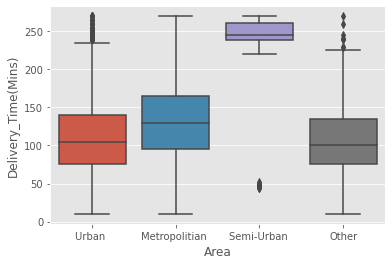

In [49]:
sns.boxplot(x=df['Area'],y=df['Delivery_Time(Mins)'])


<AxesSubplot:xlabel='Day', ylabel='count'>

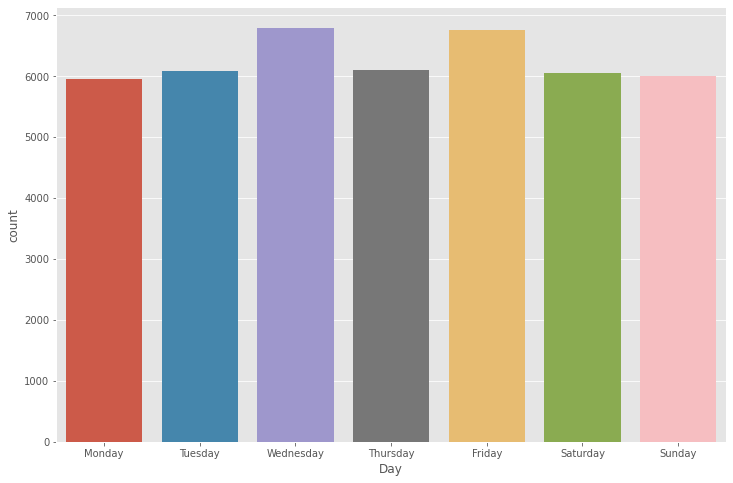

In [63]:
#count of orders on days
plt.figure(figsize=(12,8))
sns.countplot(x=df['Day'],order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
